# Topic Classification

In this project, I worked with text data from newsgroup posts on a variety of topics. I trained classifiers to distinguish posts by topics inferred from the text. Whereas with digit classification, where each input is relatively dense (represented as a 28x28 matrix of pixels, many of which are non-zero), here each document is relatively sparse (represented as a bag-of-words). Only a few words of the total vocabulary are active in any given document. The assumption is that a label depends only on the count of words, not their order.

The `sklearn` documentation on feature extraction:
http://scikit-learn.org/stable/modules/feature_extraction.html


In [1]:
conda update jupyter

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [12]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt
import math

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

# Scipy library for matrix reformatting. 
from scipy.sparse import * 

#Natural language toolkit
import nltk

Load the data, stripping out metadata so that only textual features will be used, and restricting documents to 4 specific topics. By default, newsgroups data is split into training and test sets, but here the test set gets further split into development and test sets.  (If you remove the categories argument from the fetch function calls, you'd get documents from all 20 topics.)

In [3]:
#Categories of newsgroup posts
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

#Training data partition 
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

#Test data partition 
newsgroups_test  = fetch_20newsgroups(subset='test',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

num_test = int(len(newsgroups_test.target) / 2)
test_data, test_labels   = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels     = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('dev label shape:',      dev_labels.shape)
print('test label shape:',     test_labels.shape)
print('labels names:',         newsgroups_train.target_names)

training label shape: (2034,)
dev label shape: (676,)
test label shape: (677,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


### Part 1:

For each of the first 5 training examples, print the text of the message along with the label.

In [13]:
def P1(num_examples=5):
    #for loop running through training set, print first 5 messsages 
    for i in range(num_examples):
        print("\tText :\n", train_data[i], "\tLabel :", train_labels[i], newsgroups_train.target_names[train_labels[i]])
                   
P1(5)

	Text :
 Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych 	Label : 1 comp.graphics
	Text :
 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries. 	Label : 3 talk.re

### Part 2:

Transform the training data into a matrix of **word** unigram feature vectors.  What is the size of the vocabulary? What is the average number of non-zero features per example?  What is the fraction of the non-zero entries in the matrix?  What are the 0th and last feature strings (in alphabetical order)?<br/>
_Use `CountVectorization` and its `.fit_transform` method.  Use `.nnz` and `.shape` attributes, and `.get_feature_names` method._

Now transform the training data into a matrix of **word** unigram feature vectors using your own vocabulary with these 4 words: ["atheism", "graphics", "space", "religion"].  Confirm the size of the vocabulary. What is the average number of non-zero features per example?<br/>
_Use `CountVectorization(vocabulary=...)` and its `.transform` method._

Now transform the training data into a matrix of **character** bigram and trigram feature vectors.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(analyzer=..., ngram_range=...)` and its `.fit_transform` method._

Now transform the training data into a matrix of **word** unigram feature vectors and prune words that appear in fewer than 10 documents.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(min_df=...)` and its `.fit_transform` method._

Now again transform the training data into a matrix of **word** unigram feature vectors. What is the fraction of words in the development vocabulary that is missing from the training vocabulary?<br/>
_Hint: Build vocabularies for both train and dev and look at the size of the difference._

Notes:
* `.fit_transform` makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").
* `.fit_transform` and `.transform` return sparse matrix objects.  See about them at http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html.  

In [5]:
def P2():
    
    #Word unigram feature vectors - vocabulary size
    vectorizer = CountVectorizer()
    vtrain = vectorizer.fit_transform(train_data).toarray()
    feature_names = vectorizer.get_feature_names()
    
    num_features = len(vectorizer.get_feature_names())
    vtrain_matrix = csr_matrix(vtrain)
    num_nonzero = vtrain_matrix.nnz
    num_values = vtrain_matrix.shape
    print("1)")
    print("Size of vocabulary :", num_features)
    print("Number of nonzero features :", num_nonzero)
    print("Average number of nonzero features per example :", num_nonzero/2034)
    print("Fraction (%) of nonzero features :", (100*num_nonzero)/(num_values[0]*num_values[1]))
    print("0th and last feature strings :", feature_names[0], feature_names[-1])
    
    
    #Word unigram feature vectors - 4 word vocabulary
    own_vectorizer = CountVectorizer(vocabulary = ["atheism", "graphics", "space", "religion"])
    vtrain_own = own_vectorizer.transform(train_data).toarray()
    num_features_own = len(own_vectorizer.get_feature_names())
    vtrain_own_matrix = csr_matrix(vtrain_own)
    num_nonzero_own = vtrain_own_matrix.nnz
    num_values_own = vtrain_own_matrix.shape
    
    print("2)")
    print("Size of vocabulary 4_word:", num_features_own)
    print("Average number of nonzero features per example :", num_nonzero_own/len(train_data))
    
    #Character bigram feature vector
    vectorizer_bg = CountVectorizer(analyzer = 'char', ngram_range = (2,2))
    vtrain_bg = vectorizer_bg.fit_transform(train_data).toarray()
    feature_names_bg = vectorizer_bg.get_feature_names()
    num_features_bg = len(vectorizer_bg.get_feature_names())
    vtrain_bg_matrix = csr_matrix(vtrain_bg)
    
    print("3)")
    print("Size of vocabulary character bigram :", num_features_bg)
    
    #Character trigram feature vector 
    vectorizer_tg = CountVectorizer(analyzer = 'char', ngram_range = (3,3))
    vtrain_tg = vectorizer_tg.fit_transform(train_data).toarray()
    feature_names_tg = vectorizer_tg.get_feature_names()
    num_features_tg = len(vectorizer_tg.get_feature_names())
    vtrain_tg_matrix = csr_matrix(vtrain_tg)
    
    print("Size of vocabulary character trigram :", num_features_tg)
    
    
    #Word unigram feature vectors < 10 documents
    vectorizer_10 = CountVectorizer(min_df = 10)
    vtrain_10 = vectorizer_10.fit_transform(train_data).toarray()
    feature_names_10 = vectorizer_10.get_feature_names()
    num_features_10 = len(vectorizer_10.get_feature_names())
    vtrain_matrix_10 = csr_matrix(vtrain_10)

    print("4)")
    print("Size of vocabulary unigram <10 documents:", num_features_10)
    
    #Word unigram feature vectors - dev_data  
    vectorizer_dev = CountVectorizer()
    vdev = vectorizer_dev.fit_transform(dev_data).toarray()
    feature_names_dev = vectorizer_dev.get_feature_names()
    num_features_dev = len(vectorizer_dev.get_feature_names())
    vdev_matrix = csr_matrix(vdev)
    print("5)")
    print("Size of vocabulary unigram dev data :", num_features_dev)
    
    #Word unigram feature vectors - train_data  
    vectorizer_train = CountVectorizer()
    vtrain = vectorizer_train.fit_transform(train_data).toarray()
    feature_names_train = vectorizer_train.get_feature_names()
    num_features_train = len(vectorizer_train.get_feature_names())
    vtrain_matrix = csr_matrix(vtrain)

    print("Size of vocabulary unigram train data :", num_features_train)
    print("Fraction of words in the development vocabulary that is missing from the training vocabulary :", (26879-16246)/26879)

P2()

1)
Size of vocabulary : 26879
Number of nonzero features : 196700
Average number of nonzero features per example : 96.70599803343165
Fraction (%) of nonzero features : 0.3597827226959026
0th and last feature strings : 00 zyxel
2)
Size of vocabulary 4_word: 4
Average number of nonzero features per example : 0.26843657817109146
3)
Size of vocabulary character bigram : 3291
Size of vocabulary character trigram : 32187
4)
Size of vocabulary unigram <10 documents: 3064
5)
Size of vocabulary unigram dev data : 16246
Size of vocabulary unigram train data : 26879
Fraction of words in the development vocabulary that is missing from the training vocabulary : 0.395587633468507


### Part 3:

Transform the training and development data to matrices of word unigram feature vectors.

1. Produce several k-Nearest Neigbors models by varying k, including one with k set to optimize f1 score.  For each model, show the k value and f1 score.
1. Produce several Naive Bayes models by varying smoothing (alpha), including one with alpha set approximately to optimize f1 score.  For each model, show the alpha value and f1 score.
1. Produce several Logistic Regression models by varying L2 regularization strength (C), including one with C set approximately to optimize f1 score.  For each model, show the C value, f1 score, and sum of squared weights for each topic.

* Why doesn't k-Nearest Neighbors work well for this problem?
* Why doesn't Logistic Regression work as well as Naive Bayes does?
* What is the relationship between logistic regression's sum of squared weights vs. C value?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer` and its `.fit_transform` and `.transform` methods to transform data.
* You can use `KNeighborsClassifier(...)` to produce a k-Nearest Neighbors model.
* You can use `MultinomialNB(...)` to produce a Naive Bayes model.
* You can use `LogisticRegression(C=..., solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.

KNN f1 scores : 0.39471048126424524
KNN f1 scores : 0.4004065422038378
KNN f1 scores : 0.4230384271439681
KNN f1 scores : 0.44061615064622817
KNN f1 scores : 0.44283938039620135
KNN f1 scores : 0.45790890012489927
KNN f1 scores : 0.46603879404544657
KNN f1 scores : 0.4514171340577236
KNN f1 scores : 0.45574370029982564
KNN f1 scores : 0.4444765532323276
KNN f1 scores : 0.434233473713461


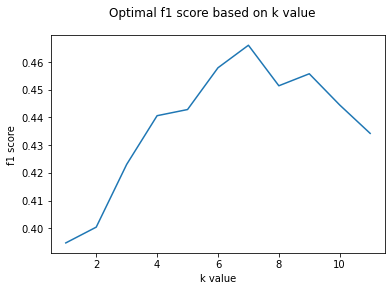

Optimal f1 score : 0.46603879404544657
k value : 7
Multinomial NB f1 scores : 0.7903052385098862
Multinomial NB f1 scores : 0.7876298330892171
Multinomial NB f1 scores : 0.787644978407044
Multinomial NB f1 scores : 0.7878811683059115
Multinomial NB f1 scores : 0.7862862961995258
Multinomial NB f1 scores : 0.7860752087513914
Multinomial NB f1 scores : 0.7847459594060138
Multinomial NB f1 scores : 0.7845011169448908
Multinomial NB f1 scores : 0.7810859843567709
Multinomial NB f1 scores : 0.7777320236017224


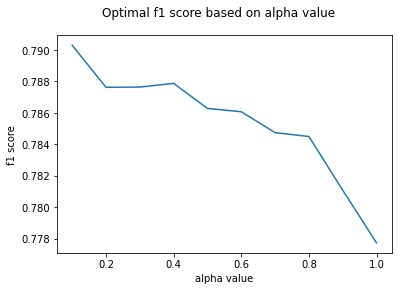

Optimal f1 score : 0.7903052385098862
alpha value : 0.1
Logistic regression f1 scores : 0.6966243542418833
Sum of squared weights : 102.28104455559837
Logistic regression f1 scores : 0.7058733693981117
Sum of squared weights : 184.48957265731505
Logistic regression f1 scores : 0.7100848889111422
Sum of squared weights : 254.835902795337
Logistic regression f1 scores : 0.7082817352512133
Sum of squared weights : 317.1831547958203
Logistic regression f1 scores : 0.7084739776490449
Sum of squared weights : 373.6565299365672
Logistic regression f1 scores : 0.7091615339971832
Sum of squared weights : 425.6852528810159
Logistic regression f1 scores : 0.6955933920829318
Sum of squared weights : 473.8321527654277
Logistic regression f1 scores : 0.6924667174169086
Sum of squared weights : 518.9388429463122
Logistic regression f1 scores : 0.694281290097654
Sum of squared weights : 561.3867406989307
Logistic regression f1 scores : 0.6944172871853819
Sum of squared weights : 601.5893248242392


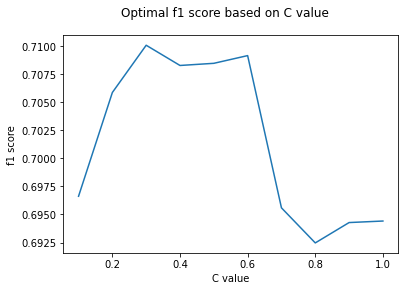

Optimal f1 score : 0.7100848889111422
C value : 0.3


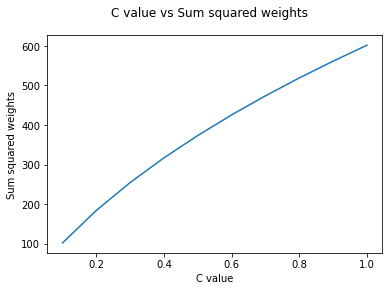

In [6]:
def P3():
    #Q1
    #Transform the training and development data to matrices of word unigram feature vectors
    #Word unigram feature vectors  
    vectorizer = CountVectorizer()

    #Word unigram feature vectors - train_data and dev_data   
    vtrain = vectorizer.fit_transform(train_data).toarray()
    vdev = vectorizer.transform(dev_data).toarray()

    #Varying k values
    k_values = np.arange(1, 12)

    #k-nearest neighbor models 
    def knn(k_values):

        for i in k_values:
            #Create k-nearest neighbor model 
            knn_model = KNeighborsClassifier(n_neighbors = i)
            #Train on transformed train data  
            knn_model.fit(vtrain, train_labels)
            #Evaluate performance on transformed train data
            knn_predict = knn_model.predict(vdev)
            #Get f1 results 
            print('KNN f1 scores :', metrics.f1_score(y_true = dev_labels, y_pred = knn_predict, average="weighted"))

    knn(k_values)
    
    #Plot of k values and f1 scores
    plt.plot([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], [0.39471048126424524, 0.4004065422038378, 0.4230384271439681, 0.44061615064622817, 0.44283938039620135, 0.45790890012489927, 0.46603879404544657, 0.4514171340577236, 0.45574370029982564, 0.4444765532323276, 0.434233473713461])
    plt.xlabel('k value')
    plt.ylabel('f1 score')
    plt.suptitle('Optimal f1 score based on k value')
    plt.show()

    print('Optimal f1 score :', 0.46603879404544657)
    print('k value :', 7)
    
    
    #Q2
    #Varying alpha values
    thresholds = np.arange(0.1, 1.1, 0.1)

    #MultinomialNB Model
    def mnb(thresholds):

        for i in thresholds:
            #Create multinomialnb model 
            mnb_model = MultinomialNB(alpha = i)
            #Train on transformed train data  
            mnb_model.fit(vtrain, train_labels)
            #Evaluate performance on transformed train data
            mnb_predict = mnb_model.predict(vdev)
            #Get f1 results 
            print('Multinomial NB f1 scores :', metrics.f1_score(y_true = dev_labels, y_pred = mnb_predict, average="weighted"))

    mnb(thresholds)
    
    #Plot of alpha values and f1 scores
    plt.plot([ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], [0.7903052385098862, 0.7876298330892171, 0.787644978407044, 0.7878811683059115, 0.7862862961995258, 0.7860752087513914, 0.7847459594060138, 0.7845011169448908, 0.7810859843567709, 0.7777320236017224])
    plt.xlabel('alpha value')
    plt.ylabel('f1 score')
    plt.suptitle('Optimal f1 score based on alpha value')
    plt.show()

    print('Optimal f1 score :', 0.7903052385098862)
    print('alpha value :', 0.1)
    
    
    #Q3
    #Varying C values
    L2_strength = np.arange(0.1, 1.0, 0.1)

    #Logistic Regression Model
    def logreg(L2_strength):

        for i in thresholds:
            #Create logistic regression model 
            logreg_model = LogisticRegression(C=i, solver="liblinear", multi_class="auto")
            #Train on transformed train data  
            logreg_model.fit(vtrain, train_labels)
            #Evaluate performance on transformed train data
            logreg_predict = logreg_model.predict(vdev)
            #Get f1 results 
            print('Logistic regression f1 scores :', metrics.f1_score(y_true = dev_labels, y_pred = logreg_predict, average="weighted"))
            #Sum of squared weights for each topic
            squared_weights = (logreg_model.coef_) ** 2
            print('Sum of squared weights :' , np.sum(squared_weights))
        
    logreg(L2_strength)
    
     
    #Plot of C values and f1 scores
    plt.plot([ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], [0.6966243542418833, 0.7058733693981117, 0.7100848889111422, 0.7082817352512133, 0.7084739776490449, 0.7091615339971832, 0.6955933920829318, 0.6924667174169086, 0.694281290097654, 0.6944172871853819])
    plt.xlabel('C value')
    plt.ylabel('f1 score')
    plt.suptitle('Optimal f1 score based on C value')
    plt.show()

    print('Optimal f1 score :', 0.7100848889111422)
    print('C value :', 0.3)
    
    
    #Plot of C values and sum squared weights 
    plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], [102.28104455559837, 184.48957265731505, 254.835902795337, 317.1831547958203, 373.6565299365672, 425.6852528810159, 473.8321527654277, 518.9388429463122, 561.3867406989307, 601.5893248242392])
    plt.xlabel('C value')
    plt.ylabel('Sum squared weights')
    plt.suptitle('C value vs Sum squared weights')
    plt.show()
P3()

ANSWER:

4) Since KNN models are made based only on similarity between features, the difference in weights of each feature are not represented. Some words in our training set are common and therefore repeated in multiple topics, but they will not necessarily be associated with the right topics due to the equal weighting of each feature. This causes a higher rate of error than is desirable.

5) The Naive Bayes model computes the probability of a given feature being associated with a specific label under the assumption that each of the features are independent, which is not always the case. The Logistic Regression model learns the probability of a sample belonging to a certain class and identifies the optimal decision boundary that best separates the classes. The Logistic Regression model doesn't work as well as Naive Bayes in this case since we have so many features but not nearly as many training examples to compare them to, making the Logistic Regression model's ability to draw an optimal decision boundary between classes less accurate. 

6) L2 regularization strength (C) and logistic regression's sum of squared weights have a positive relationship (as C value increases, the logistic regression's sum of squared weights increase). 

### Part 4:

Transform the data to a matrix of word **bigram** feature vectors.  Produce a Logistic Regression model.  For each topic, find the 5 features with the largest weights (that's 20 features in total). 

Notes:
* Train on the transformed training data.
* You can use `CountVectorizer` and its `.fit_transform` method to transform data.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `np.argsort` to get indices sorted by element value. 

In [7]:
#Indices of largest weights: returns an array of indices of the same shape as a that index data along the given axis in partitioned order.


def P4():
    ### STUDENT START ###
    #Transform to word bigram feature vector
    vectorizer_wordbg = CountVectorizer(analyzer = 'word', ngram_range = (2,2))
    vtrain_4 = vectorizer_wordbg.fit_transform(train_data).toarray()

    #Create Logistic Regression model
    logreg_4 = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    logreg_4.fit(vtrain_4, train_labels)
    weights_4 = logreg_4.coef_
    #Indices of 5 features with largest weights for each topic
    features_5 = np.argpartition(weights_4, -5)[:, -5:]
    #Order 5 features 
    for i in range(4):
        features_5[i,:] = features_5[i, np.argsort(np.take(weights_4[i,:], features_5[i,:]))[::-1]]
    features_5 = features_5.flatten()
    print(features_5)
    #Weights at each index for all topics
    matrix = np.column_stack((np.take(weights_4[0], features_5),
                              np.take(weights_4[1], features_5),
                              np.take(weights_4[2], features_5),
                              np.take(weights_4[3], features_5)))
    
P4()

[ 38326  37174 184771 193317  20596  98723  81950  40451 123709  88596
 167336 165984 145068  16732  90070 164806  37174  80535  32640 116318]


### Part 5:

To improve generalization, it is common to try preprocessing text in various ways before splitting into words. For example, you could try transforming strings to lower case, replacing sequences of numbers with single tokens, removing various non-letter characters, and shortening long words.

Produce a Logistic Regression model (with no preprocessing of text).  Evaluate and show its f1 score and size of the dictionary.

Produce an improved Logistic Regression model by preprocessing the text.  Evaluate and show its f1 score and size of the vocabulary.  Try for an improvement in f1 score of at least 0.02.

How much did the improved model reduce the vocabulary size?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer(preprocessor=...)` to preprocess strings with your own custom-defined function.
* `CountVectorizer` default is to preprocess strings to lower case.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.
* If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular.

In [8]:
def better_preprocessor(s):
   
    #Transform strings to lower case
    s = s.lower()

    #Replace sequences of numbers with single tokens
    s = re.sub("([\d]+)", " number ", s)
    
    #Remove various non-letter characters
    s = re.sub("\\W"," ",s) # remove special chars
    
    #Shorten long words
    s = re.sub("(\w{%d})\w+" % 5, "\\1", s)
    
    return s
    
def no_preprocessor(s):
    return s

def P5():
    #Feature vectors 
    vectorizer = CountVectorizer(preprocessor = no_preprocessor)

    #Feature vectors - train_data and dev_data   
    vtrain = vectorizer.fit_transform(train_data).toarray()
    vdev = vectorizer.transform(dev_data).toarray()

    #Logistic Regression model - no preprocessing
    logreg_model = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    #Train on transformed train data  
    logreg_model.fit(vtrain, train_labels)
    #Evaluate performance on transformed train data
    logreg_predict = logreg_model.predict(vdev)
    #Get f1 results 
    print('Logistic regression f1 score before preprocessing :', metrics.f1_score(y_true = dev_labels, y_pred = logreg_predict, average="weighted"))
    print('Size of dictionary before preprocessing :', vtrain.shape[1])
    
    
    #After preprocessing
    vectorizer_p = CountVectorizer(preprocessor = better_preprocessor)
    vtrain_p = vectorizer_p.fit_transform(train_data).toarray()
    vdev_p = vectorizer_p.transform(dev_data).toarray()

    #Logistic Regression model - after preprocessing
    logreg_model_p = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    #Train on transformed train data  
    logreg_model_p.fit(vtrain_p, train_labels)
    #Evaluate performance on transformed train data
    logreg_predict_p = logreg_model_p.predict(vdev_p)
    #Get f1 results 
    print('Logistic regression f1 score after preprocessing :', metrics.f1_score(y_true = dev_labels, y_pred = logreg_predict_p, average="weighted"))
    print('Size of dictionary after preprocessing :', vtrain_p.shape[1])


P5()

Logistic regression f1 score before preprocessing : 0.7069109185493502
Size of dictionary before preprocessing : 33291
Logistic regression f1 score after preprocessing : 0.7167004086618144
Size of dictionary after preprocessing : 14592


ANSWER: The improved model decreased the vocabulary size by 18699 words, roughly 56% decrease.

### Part 6:

The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. Logistic regression seeks the set of weights that minimizes errors in the training data AND has a small total size. The default L2 regularization computes this size as the sum of the squared weights (as in Part 3 above). L1 regularization computes this size as the sum of the absolute values of the weights. Whereas L2 regularization makes all the weights relatively small, L1 regularization drives many of the weights to 0, effectively removing unimportant features.

For several L1 regularization strengths ...<br/>
* Produce a Logistic Regression model using the **L1** regularization strength.  Reduce the vocabulary to only those features that have at least one non-zero weight among the four categories.  Produce a new Logistic Regression model using the reduced vocabulary and **L2** regularization strength of 0.5.  Evaluate and show the L1 regularization strength, vocabulary size, and f1 score associated with the new model.

Show a plot of f1 score vs. log vocabulary size.  Each point corresponds to a specific L1 regularization strength used to reduce the vocabulary.

How does performance of the models based on reduced vocabularies compare to that of a model based on the full vocabulary?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `LogisticRegression(..., penalty="l1")` to produce a logistic regression model using L1 regularization.
* You can use `LogisticRegression(..., penalty="l2")` to produce a logistic regression model using L2 regularization.
* You can use `LogisticRegression(..., tol=0.015)` to produce a logistic regression model using relaxed gradient descent convergence criteria.  The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.015 (the default is .0001).

In [9]:
# Notes
# set(coef.nonzero()[0]) to find indices of features/words with non zero weights and then limit the vocab to these indices. coef is transpose of model.coef_. Then CountVectorizer(vocabulary=this_limited_vocabulary)

L1 regularization strength : 0.0005
Old logistic regression model f1 score :  0.18419161809850068
New logistic regression model f1 score :  0.22971579702348932
Size of vocabulary : 1
L1 regularization strength : 0.001
Old logistic regression model f1 score :  0.24492835290439324
New logistic regression model f1 score :  0.33356858531863487
Size of vocabulary : 3
L1 regularization strength : 0.005
Old logistic regression model f1 score :  0.3865725080216888
New logistic regression model f1 score :  0.43221291386913857
Size of vocabulary : 12
L1 regularization strength : 0.01
Old logistic regression model f1 score :  0.4236482749157316
New logistic regression model f1 score :  0.4678284761184072
Size of vocabulary : 17
L1 regularization strength : 0.05
Old logistic regression model f1 score :  0.5815618895004901
New logistic regression model f1 score :  0.6421575348073696
Size of vocabulary : 124
L1 regularization strength : 0.1
Old logistic regression model f1 score :  0.644524487777198

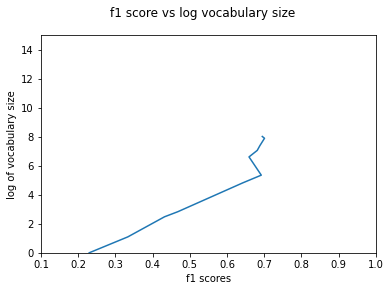

In [10]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)
    
    #Different values of C
    c_values = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]
    
    
    for i in range(len(c_values)):
        
        #Feature vectors 
        vectorizer = CountVectorizer()

        #Feature vectors - train_data and dev_data   
        vtrain = vectorizer.fit_transform(train_data).toarray()
        vdev = vectorizer.transform(dev_data).toarray()

        #Logistic Regression model - L1 regularization 
        logreg_model_L1 = LogisticRegression(C = c_values[i], penalty="l1", tol=0.015, solver='liblinear')
        #Train on transformed train data  
        logreg_model_L1.fit(vtrain, train_labels)
        #Evaluate performance on transformed train data
        logreg_predict_L1 = logreg_model_L1.predict(vdev)
        #Reduced vocabulary - have at least one non-zero weight among the four categories.
        reduced = (logreg_model_L1.coef_!= 0)
        reduced_columns = reduced.any(axis = 0)
        
        #Reduced vocabulary features
        vtrain_reduced = vtrain[:, reduced_columns]
        vdev_reduced = vdev[:, reduced_columns]
    
        #Logistic Regression model - L2 regularization 
        logreg_model_L2 = LogisticRegression(C = 0.5, penalty="l2", tol=0.015, solver='liblinear')
        #Train on transformed train data  
        logreg_model_L2.fit(vtrain_reduced, train_labels)
        #Evaluate performance on transformed train data
        logreg_predict_L2 = logreg_model_L2.predict(vdev_reduced)
        
        print('L1 regularization strength :', c_values[i])
        print('Old logistic regression model f1 score : ', metrics.f1_score(y_true = dev_labels, y_pred = logreg_predict_L1, average="weighted"))
        print('New logistic regression model f1 score : ', metrics.f1_score(y_true = dev_labels, y_pred = logreg_predict_L2, average="weighted"))
        print('Size of vocabulary :', vtrain_reduced.shape[1])
    logs = np.log([1, 3, 12, 17, 124, 212, 746, 1169, 1632, 2697, 3053])
    plt.plot([0.22971579702348932, 0.33356858531863487, 0.43221291386913857, 0.4678284761184072, 0.6421575348073696, 0.6922752960669616, 0.6593209182604232, 0.6814193753726073, 0.6886526407072935, 0.7009542911060238, 0.6950533594619739], logs)
    plt.xlim(0.1, 1)
    plt.ylim(0, 15)
    plt.xlabel('f1 scores')
    plt.ylabel('log of vocabulary size')
    plt.suptitle('f1 score vs log vocabulary size');

    
P6()

ANSWER:

The F1 scores of the new logistic regression models are always higher than those of their old regression model counterparts. Therefore, having a reduced vocabulary size increases the F1 scores. 

### Part 7:

How is `TfidfVectorizer` different than `CountVectorizer`?

Produce a Logistic Regression model based on data represented in tf-idf form, with L2 regularization strength of 100.  Evaluate and show the f1 score.  How is `TfidfVectorizer` different than `CountVectorizer`?

Show the 3 documents with highest R ratio, where ...<br/>
$R\,ratio = maximum\,predicted\,probability \div predicted\,probability\,of\,correct\,label$

Explain what the R ratio describes.  What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

Note:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `TfidfVectorizer` and its `.fit_transform` method to transform data to tf-idf form.
* You can use `LogisticRegression(C=100, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `LogisticRegression`'s `.predict_proba` method to access predicted probabilities.

In [11]:
def P7():

    TFIDF = TfidfVectorizer()
    vtrain_tfidf = TFIDF.fit_transform(train_data).toarray()
    vdev_tfidf= TFIDF.transform(dev_data).toarray()
    
    #Logistic Regression Model 
    logreg_7 = LogisticRegression(C=100, solver="liblinear", multi_class="auto")
    logreg_7.fit(vtrain_tfidf, train_labels)
    logreg_7_predict = logreg_7.predict(vdev_tfidf)
    logreg_7_predict_proba = logreg_7.predict_proba(vdev_tfidf) 
    
    #Maximum predicted probability 
    max_predict_proba = logreg_7_predict_proba.max(axis = 1)
    
    #Probability of correct labels
    correct_proba = logreg_7_predict_proba.flatten()
    
    #R ratio = max predicted probability / predicted probability of correct label
    r_ratio = max_predict_proba/correct_proba[0]
    print('R ratio :', r_ratio)
    
    #Get f1 results
    print('Logistic regression f1 score :', metrics.f1_score(y_true = dev_labels, y_pred = logreg_7_predict, average="weighted"))
    print('Logistic regression predicted probabilities :', logreg_7_predict_proba)


P7()

R ratio : [24.63726603 26.46135381 26.88423544 25.66526038 26.96620094 17.84129097
  9.68704906 27.05819446 25.6813109  18.54113553 27.21512743 27.47065979
 27.4824016  25.72288133 27.2593837  10.7275661  24.07622381  7.80487317
 27.38597986 26.913127   26.67305311 26.79211536 19.60081468 15.38863348
 15.09196661 24.82466859 24.96933453 27.44078166 27.0306493  23.21764921
  7.80487317 27.45992534 27.20210771 27.08310616 19.61488058 27.14383754
 23.64673061 17.16279175 25.10701971 18.2064719  18.0177622  21.47727407
 20.76758407 26.97362902 16.64530346 27.30260036 22.37051668 16.87704763
 26.43022305 12.57809701 26.45329891 27.25954855 24.80967498 22.5276307
 25.8745284  23.56395436 25.75024661 17.73577174 25.59533523 23.71895956
 22.85590981 13.81647309 17.05108732 17.1126965  19.31730993 23.35921501
 22.615112   15.2628417  27.20953251 26.90123764 25.10827895 22.40166784
 23.60769716 25.94861475  7.80487317 27.47191038 13.22046554 17.08235825
 11.18430134 22.13954343 27.39613067 25.05

ANSWER: Count Vectorizer computes the frequency of words within a vocabulary, while TFIDF also counts the frequency of words but with the weight of each word varying, depending on how often they come up in the vocabulary. The IDF portion of TFIDF accounts for the fact that some words appear more frequently in general, but that does not necessarily carry any meaning for what it is labeled as. 

The R ratio describes what percentage of words are correctly/incorrectly labeled.  
If the R ratio is greater than 1, meaning that the maximum predicted probability is greater than the predicted probability of a correct label, that means there are more words being incorrectly labeled. If the R ratio is less than 1, meaning the maximum predicted probability is less than the predicted probability of a correct label, not enough words are being labeled correctly. 
